In [1]:
import warnings

from NeuralNetwork.CNN import CNN_MEL, CNN_CHR, CNN_MFCC

warnings.filterwarnings("ignore")

2023-12-27 20:11:14.664279: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-27 20:11:14.715638: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-27 20:11:14.715670: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-27 20:11:14.718328: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-27 20:11:14.725899: I tensorflow/core/platform/cpu_feature_guar

In [2]:
try:
    del model_mel
    del model_chr
    del model_mfcc
    print("clean!")
except:
    pass
model_mel = CNN_MEL((128, 128, 1))
model_chr = CNN_CHR((12, 1293, 1))
model_mfcc = CNN_MFCC((20, 1293, 1))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 128)       0

2023-12-27 20:11:16.570528: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-27 20:11:16.606427: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-27 20:11:16.606593: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

None
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 12, 1293, 32)      320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 646, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 6, 646, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 3, 323, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 3, 323, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 1, 161, 128) 

Found 999 images belonging to 10 classes.
Epoch 1/4
50/50 - 2s - loss: 0.8490 - acc: 0.7157 - 2s/epoch - 40ms/step
Epoch 2/4
50/50 - 2s - loss: 0.7573 - acc: 0.7367 - 2s/epoch - 40ms/step
Epoch 3/4
50/50 - 2s - loss: 0.6985 - acc: 0.7578 - 2s/epoch - 39ms/step
Epoch 4/4
50/50 - 2s - loss: 0.5690 - acc: 0.8278 - 2s/epoch - 40ms/step


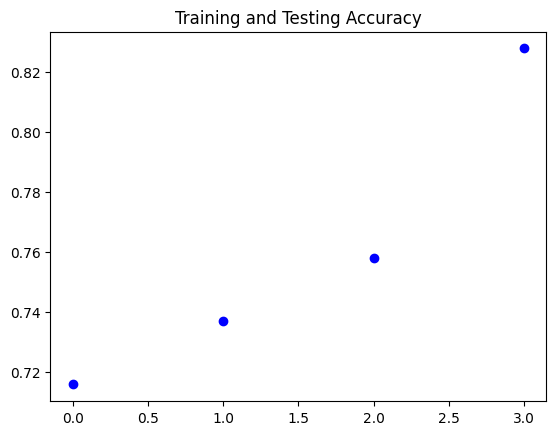

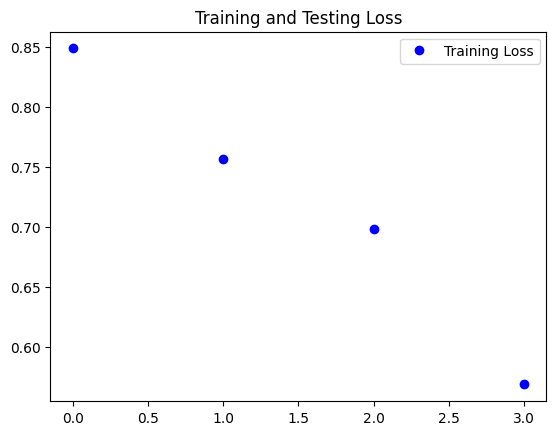

In [4]:
model_mel.train("./dataset/mel_format", "./dataset/mel_test", epoch=5)
model_chr.train("./dataset/chr_format", epoch=5)
model_mfcc.train("./dataset/mfcc_format", epoch=20)

In [5]:
model_mel.save_model("./model/model_mel.h5")
model_chr.save_model("./model/model_chr.h5")
model_mfcc.save_model("./model/model_mfcc.h5")

In [3]:
model_mel.load_model("./model/model_mel.h5")
model_chr.load_model("./model/model_chr.h5")
model_mfcc.load_model("./model/model_mfcc.h5")

In [8]:
import numpy as np
import librosa

# y, sr = librosa.load("/home/mspt5/Music/南征北战NZBZ - 我的天坑.mp3")
y, sr = librosa.load("./dataset/audio_format/jazz/jazz.00000.wav")

spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)

mel_pic = librosa.power_to_db(spectrogram, ref=np.max)

harmonic = librosa.effects.harmonic(y) ##
harmonic_features = librosa.feature.chroma_cqt(y=harmonic, sr=sr) ##

mfccs = librosa.feature.mfcc(y=y, sr=sr)

duration = len(y) / sr

ans_mel = model_mel.predict(mel_pic, duration)
print(ans_mel)
ans_chr = model_chr.predict(harmonic_features, duration)
print(ans_chr)
ans_mfcc = model_mfcc.predict(mfccs, duration)
print(ans_mfcc)

1/1 [==============================] - 0s 13ms/step
classical
1/1 [==============================] - 0s 12ms/step
chr prediction: [[0.36927968 0.05920182 0.02591438 0.09681861 0.06503341 0.20233664
  0.01526248 0.04884897 0.09074518 0.02655886]]
chr predictions: [[0.36927968 0.05920182 0.02591438 0.09681861 0.06503341 0.20233664
  0.01526248 0.04884897 0.09074518 0.02655886]]
pop
1/1 [==============================] - 0s 13ms/step
mfcc prediction: [[1.43989911e-02 7.13900081e-04 2.31871803e-04 2.30851211e-03
  1.07355163e-01 1.44544218e-04 1.02001603e-03 1.12583354e-01
  7.56388664e-01 4.85499529e-03]]
mfcc predictions: [[1.43989911e-02 7.13900081e-04 2.31871803e-04 2.30851211e-03
  1.07355163e-01 1.44544218e-04 1.02001603e-03 1.12583354e-01
  7.56388664e-01 4.85499529e-03]]
pop


In [6]:
import librosa

# 加载音频文件
audio_file = '../dataset/audio_format/blues/blues.00000.wav'  # 替换为您的音频文件路径
y, sr = librosa.load(audio_file)

# 1. 音高和旋律特征
chroma = librosa.feature.chroma_cqt(y=y, sr=sr)

# 2. 节奏和节拍
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
beat_times = librosa.frames_to_time(beat_frames, sr=sr)

# 3. 和声和和弦结构
harmonic = librosa.effects.harmonic(y)
harmonic_features = librosa.feature.chroma_cqt(y=harmonic, sr=sr)

# 4. 音色和乐器使用
mfccs = librosa.feature.mfcc(y=y, sr=sr)

# 5. 动态范围和强度
S, phase = librosa.magphase(librosa.stft(y))
rms = librosa.feature.rms(S=S)

# 6. 时间结构和形式
temporal_onset = librosa.onset.onset_strength(y=y, sr=sr)

# 7. 时域特征
zero_crossing_rate = librosa.feature.zero_crossing_rate(y)

# 输出每个特征的shape
print("Chroma (Pitch):", chroma.shape)
print("Tempo (Rhythm):", beat_times.shape)
print("Harmonic Features (Harmony):", harmonic_features.shape)
print("MFCCs (Timbre):", mfccs)
print("RMS (Dynamics):", rms.shape)
print("Temporal Onset (Form):", temporal_onset.shape)
print("Zero Crossing Rate (Time-domain):", zero_crossing_rate.shape)

TypeError: load() takes 1 positional argument but 2 were given